In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('bmh')
import paramselect
import os
import fnmatch
def recursive_glob(start, pattern):
    matches = []
    for root, dirnames, filenames in os.walk(start):
        for filename in fnmatch.filter(filenames, pattern):
            matches.append(os.path.join(root, filename))
    return matches
comps = ['AL', 'NI', 'VA']
#phase = 'FCC_L12'
#configuration = ["NI", "NI", "NI", "AL", "VA"]
#ratios = [0.25, 0.25, 0.25, 0.25, 1]
phase = 'BCC_B2'
ratios = [0.5, 0.5, 1]
configuration = [["AL"], ["NI"], ["VA"]]
datasets = paramselect.load_datasets(sorted(recursive_glob('Al-Ni', '*.json')))

In [2]:
parameters = paramselect.fit_formation_energy(comps, phase, configuration, datasets)

((T*log(T),), 'rss:', 14.988883894999999, 'AIC:', 175.26776657310174)
((T*log(T), T**2), 'rss:', 0.2873883389542129, 'AIC:', -75.802936347674901)
((T*log(T), T**2, 1/T), 'rss:', 0.0099866390517579038, 'AIC:', -288.81645914770121)
((T*log(T), T**2, 1/T, T**3), 'rss:', 0.0072673304269471536, 'AIC:', -307.1594405676077)
((T,), 'rss:', 0.0025696812500114125, 'AIC:', -379.69429855999584)
((1,), 'rss:', 986.93600967520456, 'AIC:', 443.25473306725763)


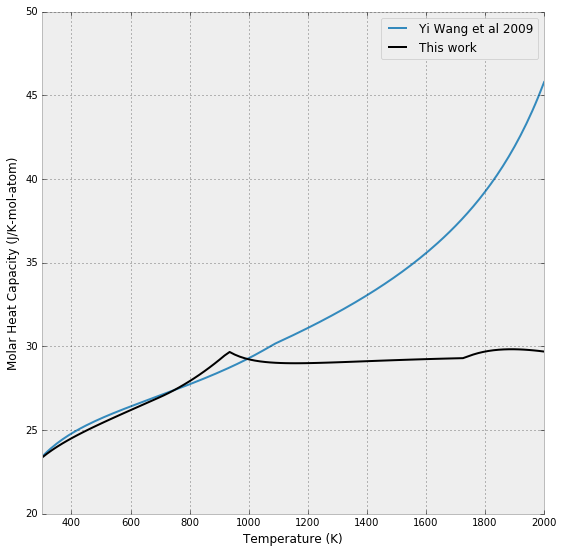

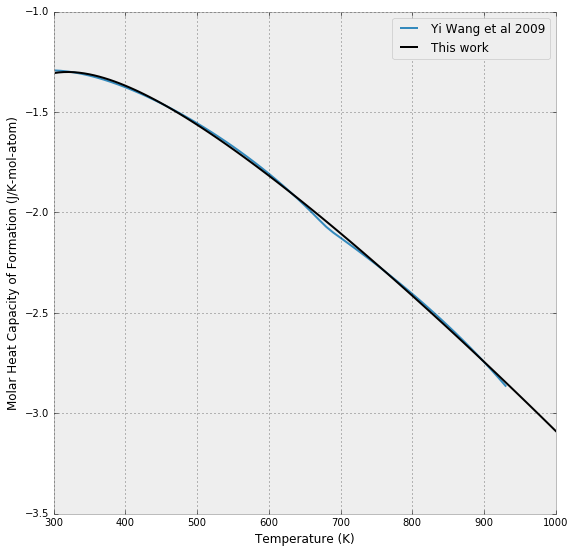

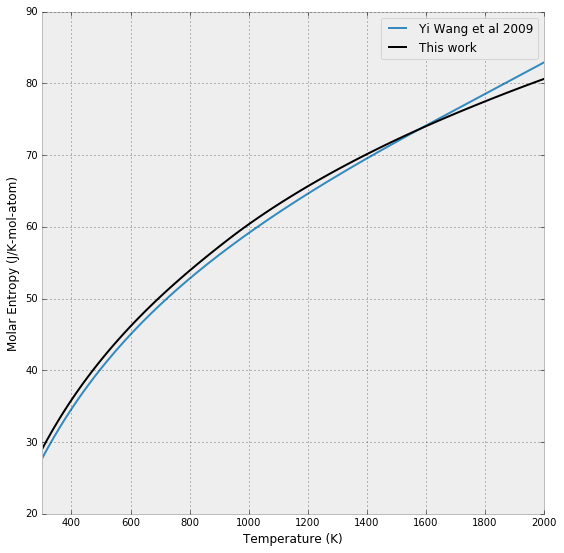

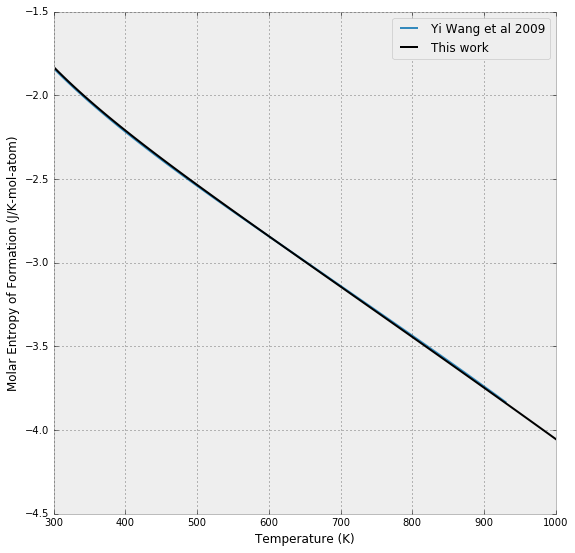

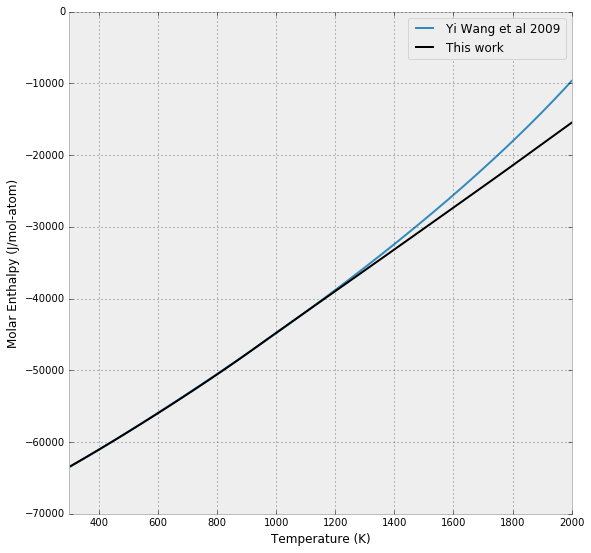

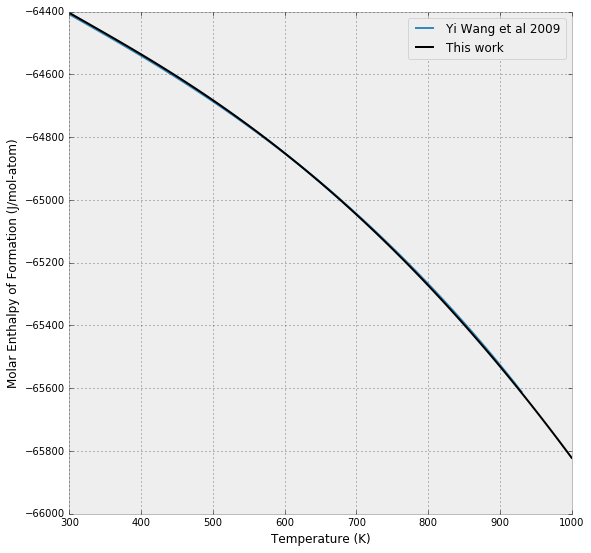

In [3]:
paramselect.plot_parameters(comps, phase, configuration, ratios, datasets, parameters)